# Enter Student Name & ID

In [1]:
student_id = 99101581  #@param {type:"integer"}
student_name = "Daniyal Rasti" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 99101581
your name: Daniyal Rasti


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [5]:
import numpy as np

In [6]:

def myPCA(X, num_components):
    # Step 1: Center the data
    X_meaned = X - np.mean(X, axis=0)

    # Step 2: Calculate the covariance matrix
    covariance_matrix = np.cov(X_meaned, rowvar=False)

    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Step 4: Sort eigenvectors by eigenvalue in descending order
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_index]

    # Step 5: Select the top 'num_components' eigenvectors
    eigenvector_subset = sorted_eigenvectors[:, :num_components]

    # Step 6: Transform the data
    X_reduced = np.dot(eigenvector_subset.T, X_meaned.T).T

    return X_reduced


### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

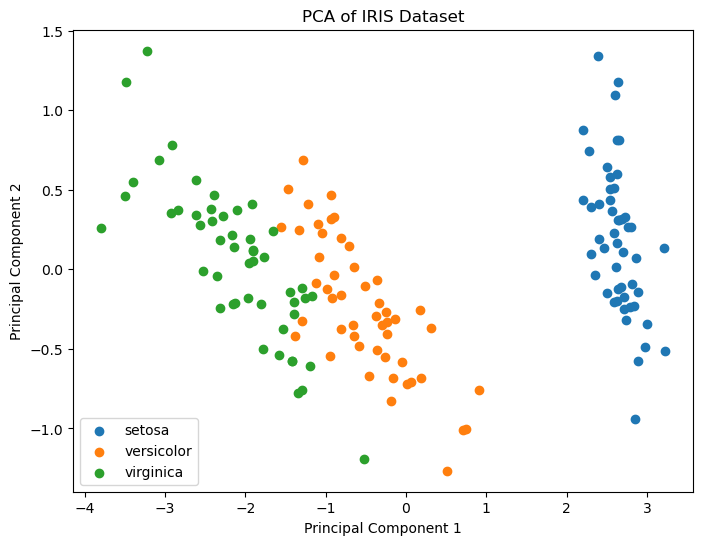

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA to reduce to 2D
X_reduced = myPCA(X, 2)

# Plot the results
plt.figure(figsize=(8, 6))
for target in np.unique(y):
    subset = X_reduced[y == target]
    plt.scatter(subset[:, 0], subset[:, 1], label=iris.target_names[target])

plt.title('PCA of IRIS Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: ` 


### 2.2 Read the given dataset and create train and test matrices. 
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [39]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

def load_images_from_folder(folder):
    images = []
    labels = []
    for i in range(1, 41):  # There are 40 folders (s1 to s40)
        for j in range(1, 11):  # Each folder contains 10 images (1.bmp to 10.bmp)
            img_path = os.path.join(folder, f's{i}', f'{j}.bmp')
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img.flatten())
                labels.append(i-1)  # Label is the folder number - 1
    return np.array(images), np.array(labels)

# Load images
data_folder = "ORL"
X, y = load_images_from_folder(data_folder)






# Split into train and test sets
X_train, X_test = [], []
y_train, y_test = [], []

for i in range(40):  # 40 individuals
    X_train.extend(X[i*10:i*10+5])  # First 5 images for training
    X_test.extend(X[i*10+5:i*10+10])  # Last 5 images for testing
    y_train.extend(y[i*10:i*10+5])
    y_test.extend(y[i*10+5:i*10+10])


X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Perform PCA and reduce dimensionality
num_components = 144 # You can choose between 40 and 50
X_train_pca = myPCA(X_train, num_components)
X_test_pca = myPCA(X_test, num_components)

# Checking the shapes of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (200, 2304)
X_test shape: (200, 2304)
X_train_pca shape: (200, 144)
X_test_pca shape: (200, 144)
y_train shape: (200,)
y_test shape: (200,)


### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

# Train the LDA classifier
lda = LDA()
lda.fit(X_train_pca, y_train)

# Predict on the test data
y_pred = lda.predict(X_test_pca)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of LDA classifier on PCA-transformed data: {accuracy * 100:.2f}%")




Accuracy of LDA classifier on PCA-transformed data: 0.50%


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?
